In [44]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt


In [21]:
data = pd.read_csv("Crimes_-_2001_to_Present.csv")


In [22]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7956582 entries, 0 to 7956581
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [23]:
print(data.head(5))

         ID Case Number                    Date                 Block  IUCR  \
0  11037294    JA371270  03/18/2015 12:00:00 PM     0000X W WACKER DR  1153   
1  11646293    JC213749  12/20/2018 03:00:00 PM  023XX N LOCKWOOD AVE  1154   
2  11645836    JC212333  05/01/2016 12:25:00 AM   055XX S ROCKWELL ST  1153   
3  11645959    JC211511  12/20/2018 04:00:00 PM    045XX N ALBANY AVE  2820   
4  11645601    JC212935  06/01/2014 12:01:00 AM   087XX S SANGAMON ST  1153   

         Primary Type                              Description  \
0  DECEPTIVE PRACTICE      FINANCIAL IDENTITY THEFT OVER $ 300   
1  DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT $300 AND UNDER   
2  DECEPTIVE PRACTICE      FINANCIAL IDENTITY THEFT OVER $ 300   
3       OTHER OFFENSE                         TELEPHONE THREAT   
4  DECEPTIVE PRACTICE      FINANCIAL IDENTITY THEFT OVER $ 300   

  Location Description  Arrest  Domestic  ...  Ward  Community Area  FBI Code  \
0                 BANK   False     False  ...  

In [39]:
data['Date'] = pd.to_datetime(data['Date'])


In [40]:
current_year = pd.Timestamp.now().year
last_three_years_data = data[data['Date'].dt.year >= current_year - 2]

In [41]:
print("First few rows of the filtered data:")
print(last_three_years_data.head())

First few rows of the filtered data:
           ID Case Number                Date                   Block  IUCR  \
371  13204489    JG416325 2023-09-06 11:00:00          0000X E 8TH ST  0810   
646  12589893    JF109865 2022-01-11 15:00:00    087XX S KINGSTON AVE  1565   
647  12592454    JF113025 2022-01-14 15:55:00       067XX S MORGAN ST  2826   
648  12785595    JF346553 2022-08-05 21:00:00  072XX S UNIVERSITY AVE  1544   
661  12808281    JF373517 2022-08-14 14:00:00     055XX W ARDMORE AVE  1562   

      Primary Type                       Description  \
371          THEFT                         OVER $500   
646    SEX OFFENSE  INDECENT SOLICITATION OF A CHILD   
647  OTHER OFFENSE    HARASSMENT BY ELECTRONIC MEANS   
648    SEX OFFENSE    SEXUAL EXPLOITATION OF A CHILD   
661    SEX OFFENSE  AGGRAVATED CRIMINAL SEXUAL ABUSE   

                       Location Description  Arrest  Domestic  ...  Ward  \
371  PARKING LOT / GARAGE (NON RESIDENTIAL)   False     False  ...   4.0   

In [42]:
summary_statistics = last_three_years_data.describe()
print("Summary statistics:")
print(summary_statistics)

Summary statistics:
                 ID                           Date           Beat  \
count  4.818200e+05                         481820  481820.000000   
mean   1.291172e+07  2023-01-02 03:03:28.652822016    1154.150407   
min    2.654300e+04            2022-01-01 00:00:00     111.000000   
25%    1.276901e+07            2022-07-18 12:00:00     533.000000   
50%    1.294601e+07            2023-01-03 08:43:30    1032.000000   
75%    1.312524e+07            2023-06-26 22:04:45    1731.000000   
max    1.330731e+07            2023-12-07 00:00:00    2535.000000   
std    7.029699e+05                            NaN     709.892553   

            District           Ward  Community Area  X Coordinate  \
count  481820.000000  481807.000000   481820.000000  4.775830e+05   
mean       11.311973      23.246410       36.290949  1.165364e+06   
min         1.000000       1.000000        1.000000  0.000000e+00   
25%         5.000000      10.000000       22.000000  1.153936e+06   
50%        10

In [43]:
# types of crimes
crime_type_distribution = last_three_years_data['Primary Type'].value_counts()
print("\nDistribution of different types of crimes:")
print(crime_type_distribution)



Distribution of different types of crimes:
Primary Type
THEFT                                107741
BATTERY                               82176
CRIMINAL DAMAGE                       55268
MOTOR VEHICLE THEFT                   48798
ASSAULT                               41888
DECEPTIVE PRACTICE                    31503
OTHER OFFENSE                         29022
ROBBERY                               19256
WEAPONS VIOLATION                     16937
BURGLARY                              14515
NARCOTICS                              9482
CRIMINAL TRESPASS                      8612
OFFENSE INVOLVING CHILDREN             3490
CRIMINAL SEXUAL ASSAULT                3044
SEX OFFENSE                            2456
PUBLIC PEACE VIOLATION                 1523
HOMICIDE                               1317
INTERFERENCE WITH PUBLIC OFFICER        942
STALKING                                919
ARSON                                   889
PROSTITUTION                            491
INTIMIDATION       

In [45]:
# Extracting month and year from the Date column
last_three_years_data['Month'] = last_three_years_data['Date'].dt.month
last_three_years_data['Year'] = last_three_years_data['Date'].dt.year
monthly_crime_counts = last_three_years_data.groupby(['Year', 'Month']).size().reset_index(name='Crime Count')

C:\Users\Admin\AppData\Local\Temp\ipykernel_8008\3847776964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_three_years_data['Month'] = last_three_years_data['Date'].dt.month
C:\Users\Admin\AppData\Local\Temp\ipykernel_8008\3847776964.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_three_years_data['Year'] = last_three_years_data['Date'].dt.year


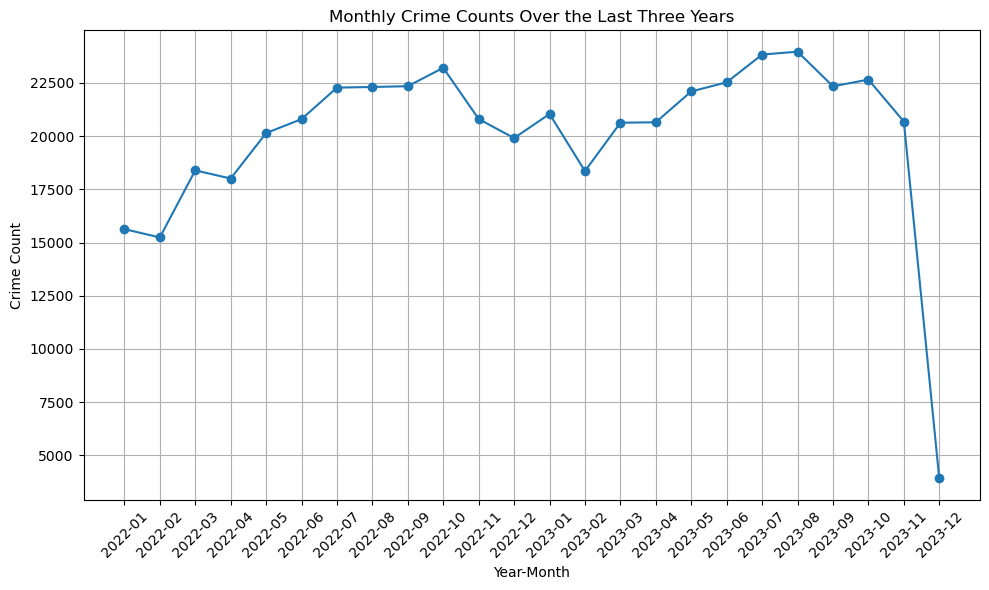

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_crime_counts['Year'].astype(str) + '-' + monthly_crime_counts['Month'].astype(str).str.zfill(2), 
         monthly_crime_counts['Crime Count'], marker='o')
plt.title('Monthly Crime Counts Over the Last Three Years')
plt.xlabel('Year-Month')
plt.ylabel('Crime Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [49]:
conn = sqlite3.connect(':memory:')
last_three_years_data.to_sql('crime_data', conn, index=False)

481820

In [50]:
#total number of crimes for the last three years
query_total_crimes = """
                     SELECT COUNT(*) as Total_Crimes
                     FROM crime_data
                     """
total_crimes = pd.read_sql_query(query_total_crimes, conn)


In [51]:
print("Total number of crimes for the last three years:")
print(total_crimes)

Total number of crimes for the last three years:
   Total_Crimes
0        481820


In [58]:
query_crimes_per_type = """
                        SELECT `Primary Type`, COUNT(*) as Num_Crimes
                        FROM crime_data
                        GROUP BY `Primary Type`
                        ORDER BY Num_Crimes DESC
                        LIMIT 10
                        """
crimes_per_type = pd.read_sql_query(query_crimes_per_type, conn)

In [59]:
print("\nNumber of crimes per primary type (Top 10):")
print(crimes_per_type)


Number of crimes per primary type (Top 10):
          Primary Type  Num_Crimes
0                THEFT      107741
1              BATTERY       82176
2      CRIMINAL DAMAGE       55268
3  MOTOR VEHICLE THEFT       48798
4              ASSAULT       41888
5   DECEPTIVE PRACTICE       31503
6        OTHER OFFENSE       29022
7              ROBBERY       19256
8    WEAPONS VIOLATION       16937
9             BURGLARY       14515


In [68]:
# number of crimes per month for each year
query_crimes_per_month = """
                         SELECT strftime('%Y', Date) as Year, strftime('%m', Date) as Month, COUNT(*) as Num_Crimes
                         FROM crime_data
                         GROUP BY Year, Month
                         """
crimes_per_month = pd.read_sql_query(query_crimes_per_month, conn)

In [69]:
print("\nNumber of crimes per month for each year:")
print(crimes_per_month)


Number of crimes per month for each year:
    Year Month  Num_Crimes
0   2022    01       15632
1   2022    02       15240
2   2022    03       18392
3   2022    04       18009
4   2022    05       20146
5   2022    06       20800
6   2022    07       22282
7   2022    08       22311
8   2022    09       22348
9   2022    10       23211
10  2022    11       20806
11  2022    12       19909
12  2023    01       21044
13  2023    02       18360
14  2023    03       20632
15  2023    04       20653
16  2023    05       22103
17  2023    06       22530
18  2023    07       23835
19  2023    08       23971
20  2023    09       22344
21  2023    10       22658
22  2023    11       20687
23  2023    12        3917


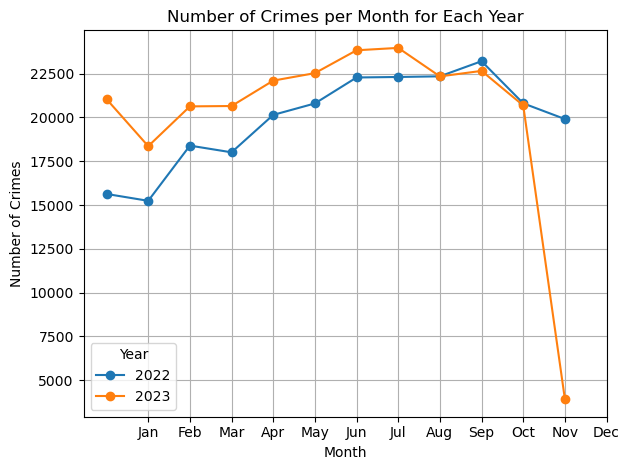

In [66]:
for year in crimes_per_month['Year'].unique():
    year_data = crimes_per_month[crimes_per_month['Year'] == year]

    plt.plot(year_data['Month'], year_data['Num_Crimes'], marker='o', label=year)

plt.title('Number of Crimes per Month for Each Year')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

In [70]:
# top 10 locations with the highest number of crimes
query_top_locations = """
                      SELECT `Location Description`, COUNT(*) as Num_Crimes
                      FROM crime_data
                      GROUP BY `Location Description`
                      ORDER BY Num_Crimes DESC
                      LIMIT 10
                      """
top_locations = pd.read_sql_query(query_top_locations, conn)


In [71]:
print("\nTop 10 locations with the highest number of crimes:")
print(top_locations)


Top 10 locations with the highest number of crimes:
                     Location Description  Num_Crimes
0                                  STREET      140292
1                               APARTMENT       90665
2                               RESIDENCE       59490
3                                SIDEWALK       24301
4  PARKING LOT / GARAGE (NON RESIDENTIAL)       18634
5                      SMALL RETAIL STORE       13930
6                                   ALLEY       10754
7                              RESTAURANT        9820
8                        DEPARTMENT STORE        7170
9                         OTHER (SPECIFY)        7083


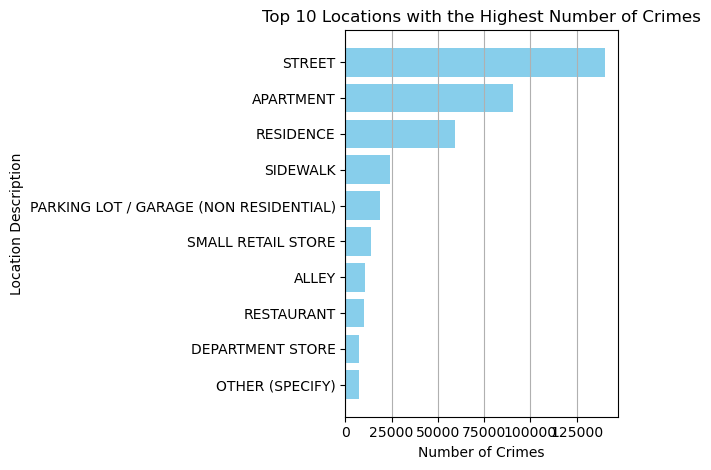

In [67]:
plt.barh(top_locations['Location Description'], top_locations['Num_Crimes'], color='skyblue')

plt.title('Top 10 Locations with the Highest Number of Crimes')
plt.xlabel('Number of Crimes')
plt.ylabel('Location Description')
plt.gca().invert_yaxis()  
plt.grid(axis='x')
plt.tight_layout()
plt.show()